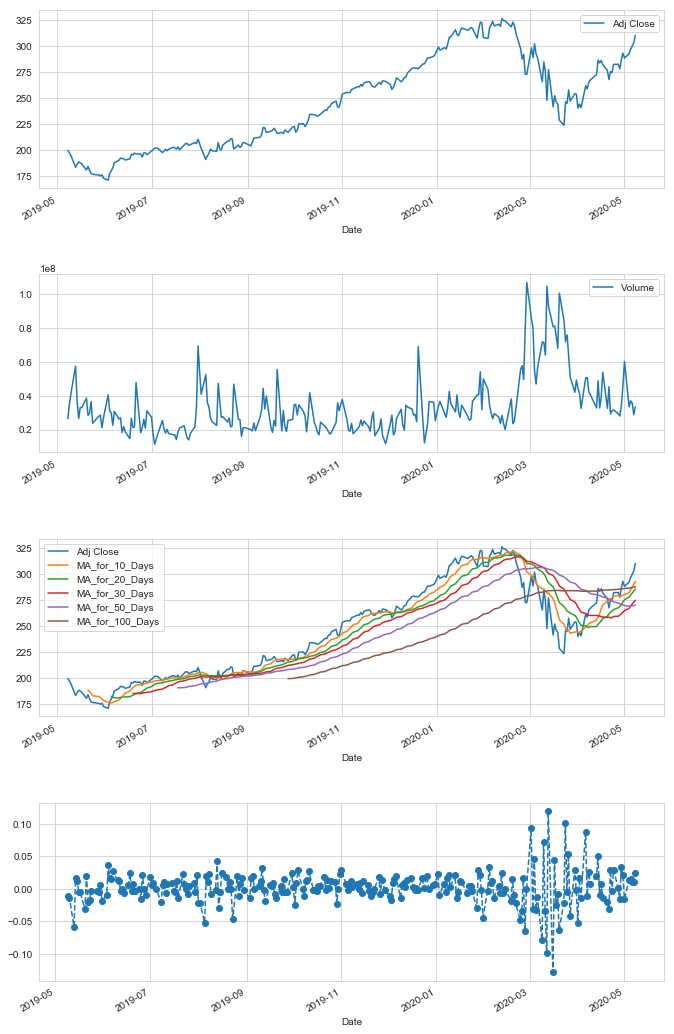

In [33]:
import re
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime
sns.set_style('whitegrid')
%matplotlib inline
##Looking into these 4 stocks only
tech_list=['AAPL','GOOG','MSFT','AMZN']
##Date for Start and End date
end_dt=datetime.now()
strt_dt=datetime(end_dt.year-1,end_dt.month,end_dt.day)


for stock in tech_list:
    #Globals will create 4 Global variable coming from list variable created by below statement is read data from yahoo website
    #for all the stocks in list tech_list and create dataframe for AAPL,GOOG,MSFT,AMZN
    #All dataframes will have data from start_dt to End_dt i.e AAPL will have data accordinly 
    globals()[stock]=data.DataReader(stock,'yahoo',strt_dt,end_dt)

#Create Dataframe with all the shares with Adj_close column
closing_df=data.DataReader(tech_list,'yahoo',strt_dt,end_dt)['Adj Close']
#closing_df.head()
#Tech Rate is the percentage of closing_Df dataset i.e Adj Close's column of all tech_list
tech_rate=closing_df.pct_change()

#Reading list for Moving Average days List
#In For loop we have created col name and then assiged it to AAPL dataframe 
#This will create new colums in AAPL DataFrame
ma_day=[10,20,30,50,100]
for ma in ma_day:
    column_name = 'MA_for_%s_Days' %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

#Created new column as Daily_Return in AAPL dataframe
AAPL['Daily_Return']=AAPL['Adj Close'].pct_change()

f,axes=plt.subplots(4,1,figsize=(10,10))
AAPL['Adj Close'].plot(legend=True,ax=axes[0])
AAPL['Volume'].plot(legend=True,ax=axes[1])
AAPL[['Adj Close','MA_for_10_Days','MA_for_20_Days','MA_for_30_Days','MA_for_50_Days','MA_for_100_Days']].plot(subplots=False,figsize=(10,10),ax=axes[2])
AAPL['Daily_Return'].plot(subplots=False,figsize=(10,15),linestyle='--',marker='o',ax=axes[3])
f.tight_layout(pad=3.0)
plt.show()


In [35]:
tech_rate.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-08,NaN,NaN,NaN,NaN
2019-05-09,-0.010744,-0.009334,-0.003335,-0.000080
2019-05-10,-0.013853,-0.005206,0.001626,0.012988
2019-05-13,-0.058119,-0.035609,-0.027691,-0.029733
2019-05-14,0.015830,0.009568,-0.010238,0.011188


AttributeError: 'list' object has no attribute 'columns'

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-07,207.419998,200.830002,205.880005,202.860001,38763700.0,200.239075
2019-05-08,205.339996,201.750000,201.899994,202.899994,26339500.0,200.278534
2019-05-09,201.679993,196.660004,200.399994,200.720001,34908600.0,198.126709
2019-05-10,198.850006,192.770004,197.419998,197.179993,41208700.0,195.381973
2019-05-13,189.479996,182.850006,187.710007,185.720001,57430600.0,184.026489
2019-05-14,189.699997,185.410004,186.410004,188.660004,36529700.0,186.939667
2019-05-15,191.750000,186.020004,186.270004,190.919998,26544700.0,189.179062
2019-05-16,192.470001,188.839996,189.910004,190.080002,33031400.0,188.346725
2019-05-17,190.899994,186.759995,186.929993,189.000000,32879100.0,187.276581
